# OBJECTIVE: We need to predict the Salary based on years of experience

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [7]:
Salary = pd.read_csv("/content/Salary_Data.csv")
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
# There are no Null Values in the Data Set

In [10]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
Salary['Salary'].unique()

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
Salary['Salary'].value_counts()

109431.0    1
37731.0     1
56957.0     1
57081.0     1
63218.0     1
91738.0     1
98273.0     1
46205.0     1
60150.0     1
105582.0    1
122391.0    1
64445.0     1
121872.0    1
112635.0    1
93940.0     1
39891.0     1
81363.0     1
57189.0     1
61111.0     1
56642.0     1
43525.0     1
101302.0    1
66029.0     1
55794.0     1
54445.0     1
39343.0     1
116969.0    1
67938.0     1
113812.0    1
83088.0     1
Name: Salary, dtype: int64

In [13]:
# From the above we saw that the observations are unique as the value count is 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


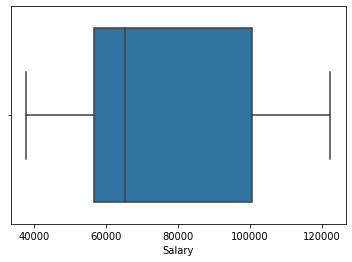

In [14]:
sns.boxplot(Salary['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


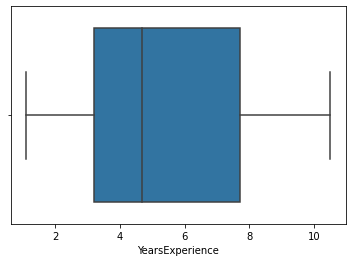

In [15]:
sns.boxplot(Salary['YearsExperience'])

In [16]:
# There are no Outlier in the Data Set.

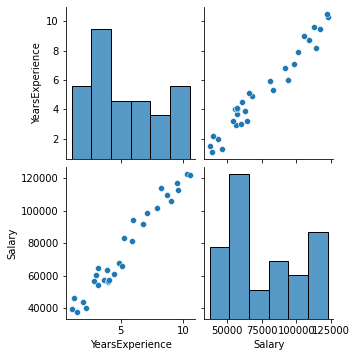

In [17]:
sns.pairplot(Salary)

In [18]:
# We observe that there is a positive correlation between both the variables.
# Increase in years of experience resulting in increase of salary

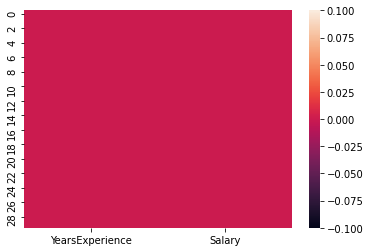

In [19]:
# HEATMAP 
sns.heatmap(Salary.isnull())

In [20]:
# We can see there are no missing values in the above heat map.

In [21]:
# CORRELATION
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


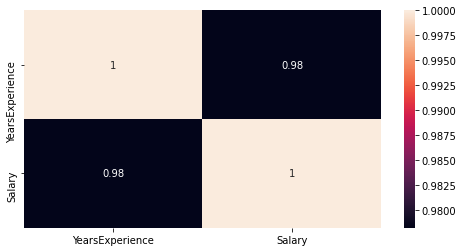

In [22]:
# Showing the Correlation with the help of heatmap
plt.figure(figsize=(8,4))
sns.heatmap(Salary.corr(),annot=True)

In [23]:
# From the above Correlation we can see that there is a high(0.978242) positive correlation

In [24]:
# MODEL BUILDING-1

Model1 = smf.ols('Salary~YearsExperience',data = Salary).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        08:54:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
stats.ttest_ind(Salary['YearsExperience'],Salary['Salary'])

Ttest_indResult(statistic=-15.183845664345355, pvalue=7.216326684306974e-22)

In [26]:
Model1.resid.head()

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

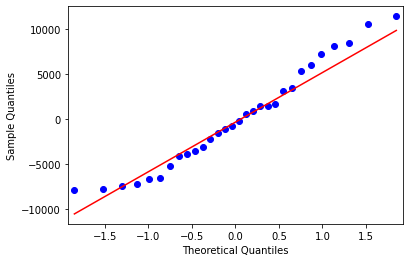

In [27]:
# QQ Plot Representation
QQ = sm.qqplot(Model1.resid, line = 'q')

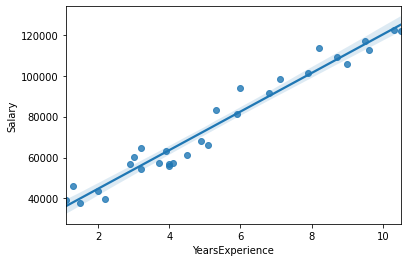

In [28]:
sns.regplot(x="YearsExperience", y="Salary", data = Salary)

In [29]:
# Prediction

Predict = Model1.predict()
Predict

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [30]:
# R-squared and adj.R-Squared Values
Model1.rsquared, Model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [31]:
Model1.tvalues # Calculating the t-value

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [32]:
Model1.pvalues # Calculating the pvalue

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

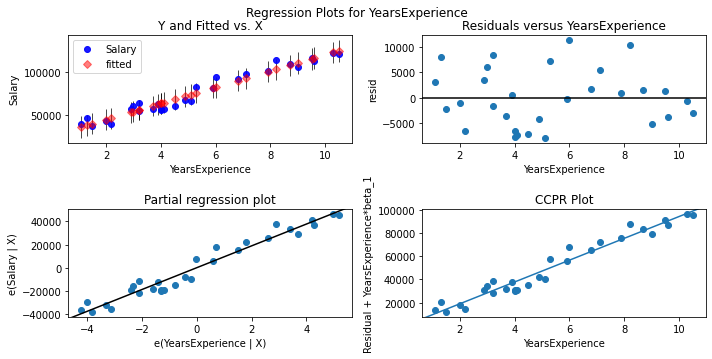

In [33]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(Model1,"YearsExperience", fig=fig)
plt.show()

In [43]:
# Prediction of Salary as per years of experience.
# Taking New Values as 12, 14, 16, 18,20

Data1 = pd.Series([12, 14,16,18,20])
Data1

0    12
1    14
2    16
3    18
4    20
dtype: int64

In [44]:
Data2 = pd.DataFrame(Data1, columns=['YearsExperience'])
Data2

,YearsExperience
0,12
1,14
2,16
3,18
4,20


In [48]:
Model1.predict(Data2)

0    139191.748056
1    158091.672699
2    176991.597342
3    195891.521985
4    214791.446628
dtype: float64

In [ ]:
# From the above prediction we conclude that the salaries of people having experience of 12, 14,16,18,20 years are 139191.748056, 158091.672699, 176991.597342, 195891.521985, 214791.446628 respectively